In [6]:
import pandas
import numpy
import matplotlib.pyplot as plt

!pip install https://raw.githubusercontent.com/stikpet/stikpetP/main/stikpetP.tar.gz

import stikpetP as ps

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 249.2/249.2 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for stikpetP: filename=stikpetP-0.0.3-py3-none-any.whl size=416660 sha256=18dac41e6eac52c408676ff710b83e8d945036fe5b952f38c33458ff26e18c04
  Stored in directory: /tmp/pip-ephem-wheel-cache-j3dsuhck/wheels/65/58/9c/d9a9e2185c9bb20de121369a2b0f5452a2a582c4b4df87e446
Successfully built stikpetP


In [3]:
data = pandas.read_csv('StudentStatistics.csv', sep = ';')
data.head()

,RespNr,Location,OAA_ObjCourse,OAA_ObjClass,OAA_CourseExec,OAA_RelActObj,OAA_RelActExa,OAA_RelObjExa,OAA_LearProcAct,OAA_LearProcPrep,...,Mix_IntDiscus,Mix_IntPrep,Mix_IntExcel,Over_Grade,Gen_Gender,Gen_Age,Gen_SecSchool,Gen_Classes,Gen_NumberSubj,Gen_Time
0,1.0,Rotterdam,Fully Disagree,Fully Disagree,Fully Disagree,Disagree,Fully Disagree,Fully Disagree,Fully Disagree,Fully Disagree,...,Not at all,not so much,not so much,20.0,Female,22.0,NaN,NaN,Fully agree,20 < 30
1,2.0,Haarlem,Disagree,Disagree,NaN,Fully Disagree,Neither disagree nor agree,Agree,Disagree,Neither disagree nor agree,...,not so much,somewhat,somewhat,50.0,Male,NaN,The Netherlands,6.0,Disagree,10 < 20
2,3.0,Diemen,Fully agree,Fully agree,Agree,Fully agree,Fully agree,Fully agree,Fully agree,Agree,...,Very much,somewhat,somewhat,80.0,Male,37.0,Africa,7.0,Agree,10 < 20
3,4.0,Rotterdam,Fully Disagree,Neither disagree nor agree,Disagree,Neither disagree nor agree,Neither disagree nor agree,Fully Disagree,Fully Disagree,Neither disagree nor agree,...,NaN,neutral,neutral,15.0,Female,24.0,The Netherlands,6.0,Agree,10 < 20
4,5.0,Haarlem,Disagree,Agree,Fully Disagree,Neither disagree nor agree,Fully agree,Fully agree,Neither disagree nor agree,Fully agree,...,Not at all,somewhat,Very much,40.0,Male,19.0,The Netherlands,7.0,Fully agree,10 < 20


In [4]:
#H0 - There is no influence of the place of school and the feeling of the activities
#Ha - There is an influence of the place of school and the feeling of the activities

# Creating a table representation of the nominal(Location) and the ordinal(Mix_NrAct) data

pandas.crosstab(data['Location'], data['Mix_NrAct'])

Mix_NrAct,Enough,Far too little,Far too much,Too much,too little
Location,,,,,
Diemen,8,1,2,6,0
Haarlem,12,1,0,4,2
Rotterdam,7,0,0,5,3


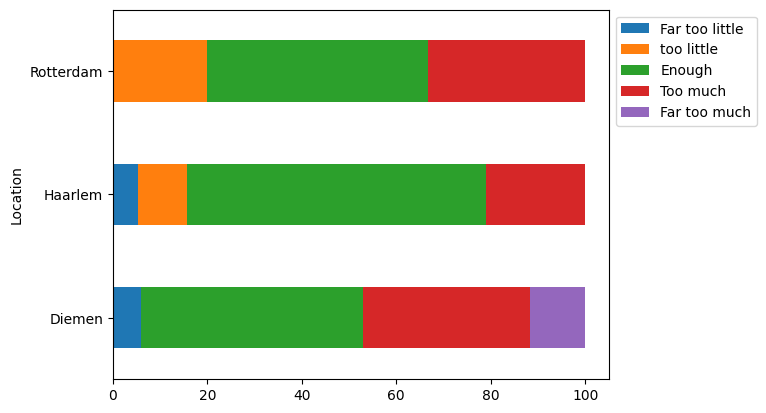

In [7]:
coding = {'Far too little':0, 'too little':1, 'Enough':2, 'Too much':3, 'Far too much':4}

ps.vi_bar_stacked_multiple(data['Location'], data['Mix_NrAct'], coding)

In [8]:
# Implementing the kruskal wallis h test

from scipy.stats import kruskal

# Saving the collective data of Mix_NrAct and the Location data as per city names

rotterdamScores = data['Mix_NrAct'][data['Location'] == 'Rotterdam'].dropna()
diemenScores = data['Mix_NrAct'][data['Location'] == 'Diemen'].dropna()
haarlemScores = data['Mix_NrAct'][data['Location'] == 'Haarlem'].dropna()

# replacing the Mix_NrAct string values as numbers for each city

rotterdamScores = rotterdamScores.replace(coding)
diemenScores = diemenScores.replace(coding)
haarlemScores = haarlemScores.replace(coding)


In [9]:
# Performing the kruskal wallis h test

kruskal(rotterdamScores, diemenScores, haarlemScores)

KruskalResult(statistic=3.335068971240797, pvalue=0.1887117641109804)

In [10]:
pvalue=0.1887117641109804

# null hypothesis is accepted

In [11]:
# Calculating the effect size using Epsilon square

H = 3.335068971240797
n = pandas.crosstab(data['Location'], data['Mix_NrAct']).sum().sum()
print(H, n)

3.335068971240797 51


In [12]:
esq = H * ((n+1)/ (n**2 -1))

esq

0.06670137942481594

In [13]:
if esq < 0.01:
  print('Negligible')
elif esq < 0.04:
  print('weak')
elif esq < 0.16:
  print('moderate')
elif esq < 0.36:
  print('relatively strong')
elif esq < 0.64:
  print('strong')
else:
  print('very strong')


moderate


The kruskal wallis h test does not found any influence of the place of school anf the feeling of the activities (p=0.18)
Also the epsilon square test was moderate (esq=0.066)